# Deskew, Scale, PCA 

####  Goals
* `train_test_split`, deskew, and scale fitting on `X_train` and transforming on `X_test`.
* PCA on scaled data.
* Cluster analysis on PCA components.

#### Output 
* Augmented datasets with PCA data.

In [1]:
cd ..

/home/jovyan/Capstone


In [2]:
%run lib/__init__.py
%run ./lib/preprocessing.py
%matplotlib inline

## 0. Load Data

In [3]:
removed_outliers_raw_df = pd.read_pickle('./data/removed_outliers_raw_df.pkl')
removed_outliers_raw_df.shape

(1007, 86)

In [4]:
# to get a list of the numerical columns
commute_stats_df = pd.read_pickle('./data/commute_stats_dropped_correlated_features_df.pkl')
commute_stats_df.shape

(40, 8)

## 1. `train_test_split` on ... `commute_removed_outliers_df`

In [5]:
data_set   = removed_outliers_raw_df.drop(['Alone_Share'], axis=1)
target_set = removed_outliers_raw_df['Alone_Share']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_set, target_set, test_size=0.3)

## 2. Separate Numeric from Categorical Columns

In [7]:
numeric_columns = list(commute_stats_df.index)
numeric_columns.remove('Alone_Share')

In [8]:
X_train_numeric = X_train[numeric_columns]
X_test_numeric  = X_test[numeric_columns]
X_train_numeric.shape, X_test_numeric.shape

((704, 39), (303, 39))

In [9]:
X_train_numeric += 1E-9
X_test_numeric += 1E-9

## 3. Pipeline Build
* BoxCoxTransformer
* StandardScaler

In [10]:
from lib.preprocessing import BoxCoxTransformer

In [11]:
pipeline = Pipeline([
    ('boxcox'  , BoxCoxTransformer()),
    ('ss'      , StandardScaler())
])

In [12]:
X_train_pipe = pipeline.fit_transform(X_train_numeric)

In [13]:
X_test_pipe = pipeline.transform(X_test_numeric)

In [14]:
X_train_sc_df = pd.DataFrame(X_train_pipe, 
                             columns=X_train_numeric.columns,
                             index=X_train_numeric.index)

In [15]:
X_test_sc_df = pd.DataFrame(X_test_pipe, 
                            columns=X_test_numeric.columns,
                            index=X_test_numeric.index)

## 4. PCA
* On numeric features only

In [16]:
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_pipe)
pca.components_ # these are loadings, 
pca.explained_variance_ratio_

array([ 0.18106983,  0.1103551 ,  0.06127798,  0.05261323,  0.05001423,
        0.04459401,  0.03994098,  0.03636524,  0.03367118,  0.03066537,
        0.02922129,  0.02673534,  0.02488674,  0.02418555,  0.02229629])

In [17]:
X_train_pca_df = pd.DataFrame(X_train_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_train_numeric.index)
X_train_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
439,-2.420144,-0.678196,-1.976323,0.707872,-0.235317,-0.484641,1.552649,0.589634,-1.422322,1.659828,-1.056085,-0.313468,0.166310,-0.943150,0.570957
438,-2.360658,0.043281,-1.536995,1.106442,1.101193,-0.476843,0.342591,0.201479,-2.745038,1.693343,0.515004,0.685865,0.607922,-0.553277,0.712687
71,0.495880,-4.262387,-0.655789,-0.522647,2.608945,0.067558,-0.265818,-0.235762,1.529754,0.734222,-1.192263,1.101691,-0.186147,-0.165540,-0.310405
625,-2.428973,1.157768,2.905958,-0.826671,-0.791136,-0.897443,0.958265,-1.150376,-2.133634,1.804177,0.687856,1.477974,0.523871,0.860695,-0.598379
36,-2.759414,-0.258282,-1.049708,-0.247071,-0.496255,2.157014,-0.317105,-0.272378,-0.811182,0.846751,0.809240,-0.308738,-0.397553,1.161350,-0.023931


In [18]:
X_test_pca = pca.transform(X_test_pipe)
X_test_pca_df = pd.DataFrame(X_test_pca, 
                              columns=['PComponent_1',
                                       'PComponent_2',
                                       'PComponent_3',
                                       'PComponent_4',
                                       'PComponent_5',
                                       'PComponent_6',
                                       'PComponent_7',
                                       'PComponent_8',
                                       'PComponent_9',
                                       'PComponent_10',
                                       'PComponent_11',
                                       'PComponent_12',
                                       'PComponent_13',
                                       'PComponent_14',
                                       'PComponent_15'],
                              index=X_test_numeric.index)
X_test_pca_df.head()

,PComponent_1,PComponent_2,PComponent_3,PComponent_4,PComponent_5,PComponent_6,PComponent_7,PComponent_8,PComponent_9,PComponent_10,PComponent_11,PComponent_12,PComponent_13,PComponent_14,PComponent_15
278,-2.834171,-1.184027,1.524613,-1.345180,2.494465,-1.110825,0.459675,-1.278282,-0.121108,0.497272,-1.634386,0.457426,-0.378921,2.435312,0.241770
241,4.670021,1.354139,-1.098021,1.630827,-2.256987,-0.361137,-1.650178,-0.895524,1.306681,1.079322,1.405038,0.317456,1.785079,1.062268,0.244724
201,-0.061953,1.701433,2.382369,0.941741,1.762739,2.159492,-1.098472,0.858502,0.792501,-0.581754,0.818247,2.297151,0.267569,0.599557,-0.032550
163,-0.802282,-2.539552,-0.829761,-1.807293,2.901756,0.018242,0.034680,-0.254520,1.475302,1.005175,0.943733,0.667672,0.505149,1.094274,0.448020
930,0.805204,3.445781,0.162244,-0.938755,0.310895,-1.888736,-0.397298,0.064290,0.834836,0.328072,-1.008212,-0.972419,0.562955,-0.269624,0.654695


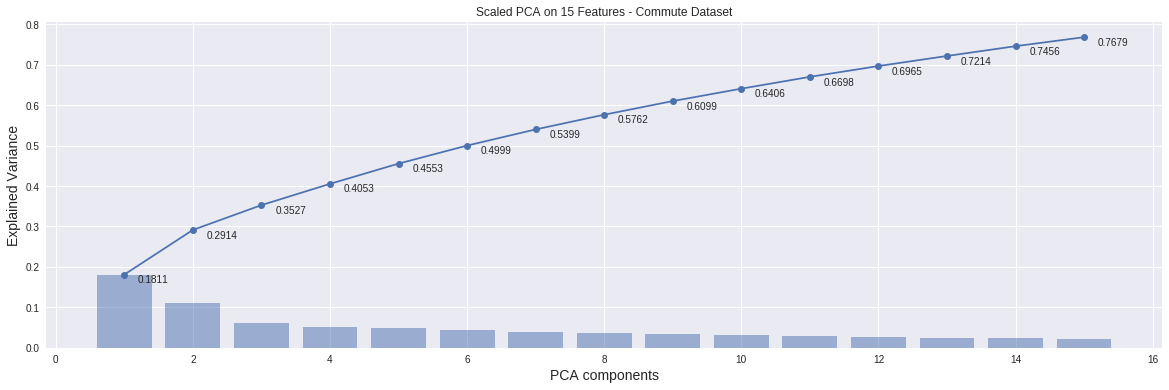

In [19]:
fig = plt.figure(figsize=(20,6))

x = np.arange(1,16)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x, cumulative_explained_variance,'-o')
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))

plt.xlabel('PCA components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Scaled PCA on 15 Features - Commute Dataset')
plt.savefig('./figures/pca-15-features.png')

In [20]:
import lib.viz_helper as viz

In [21]:
pca = PCA(n_components=1)
pca.fit(X_train_sc_df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

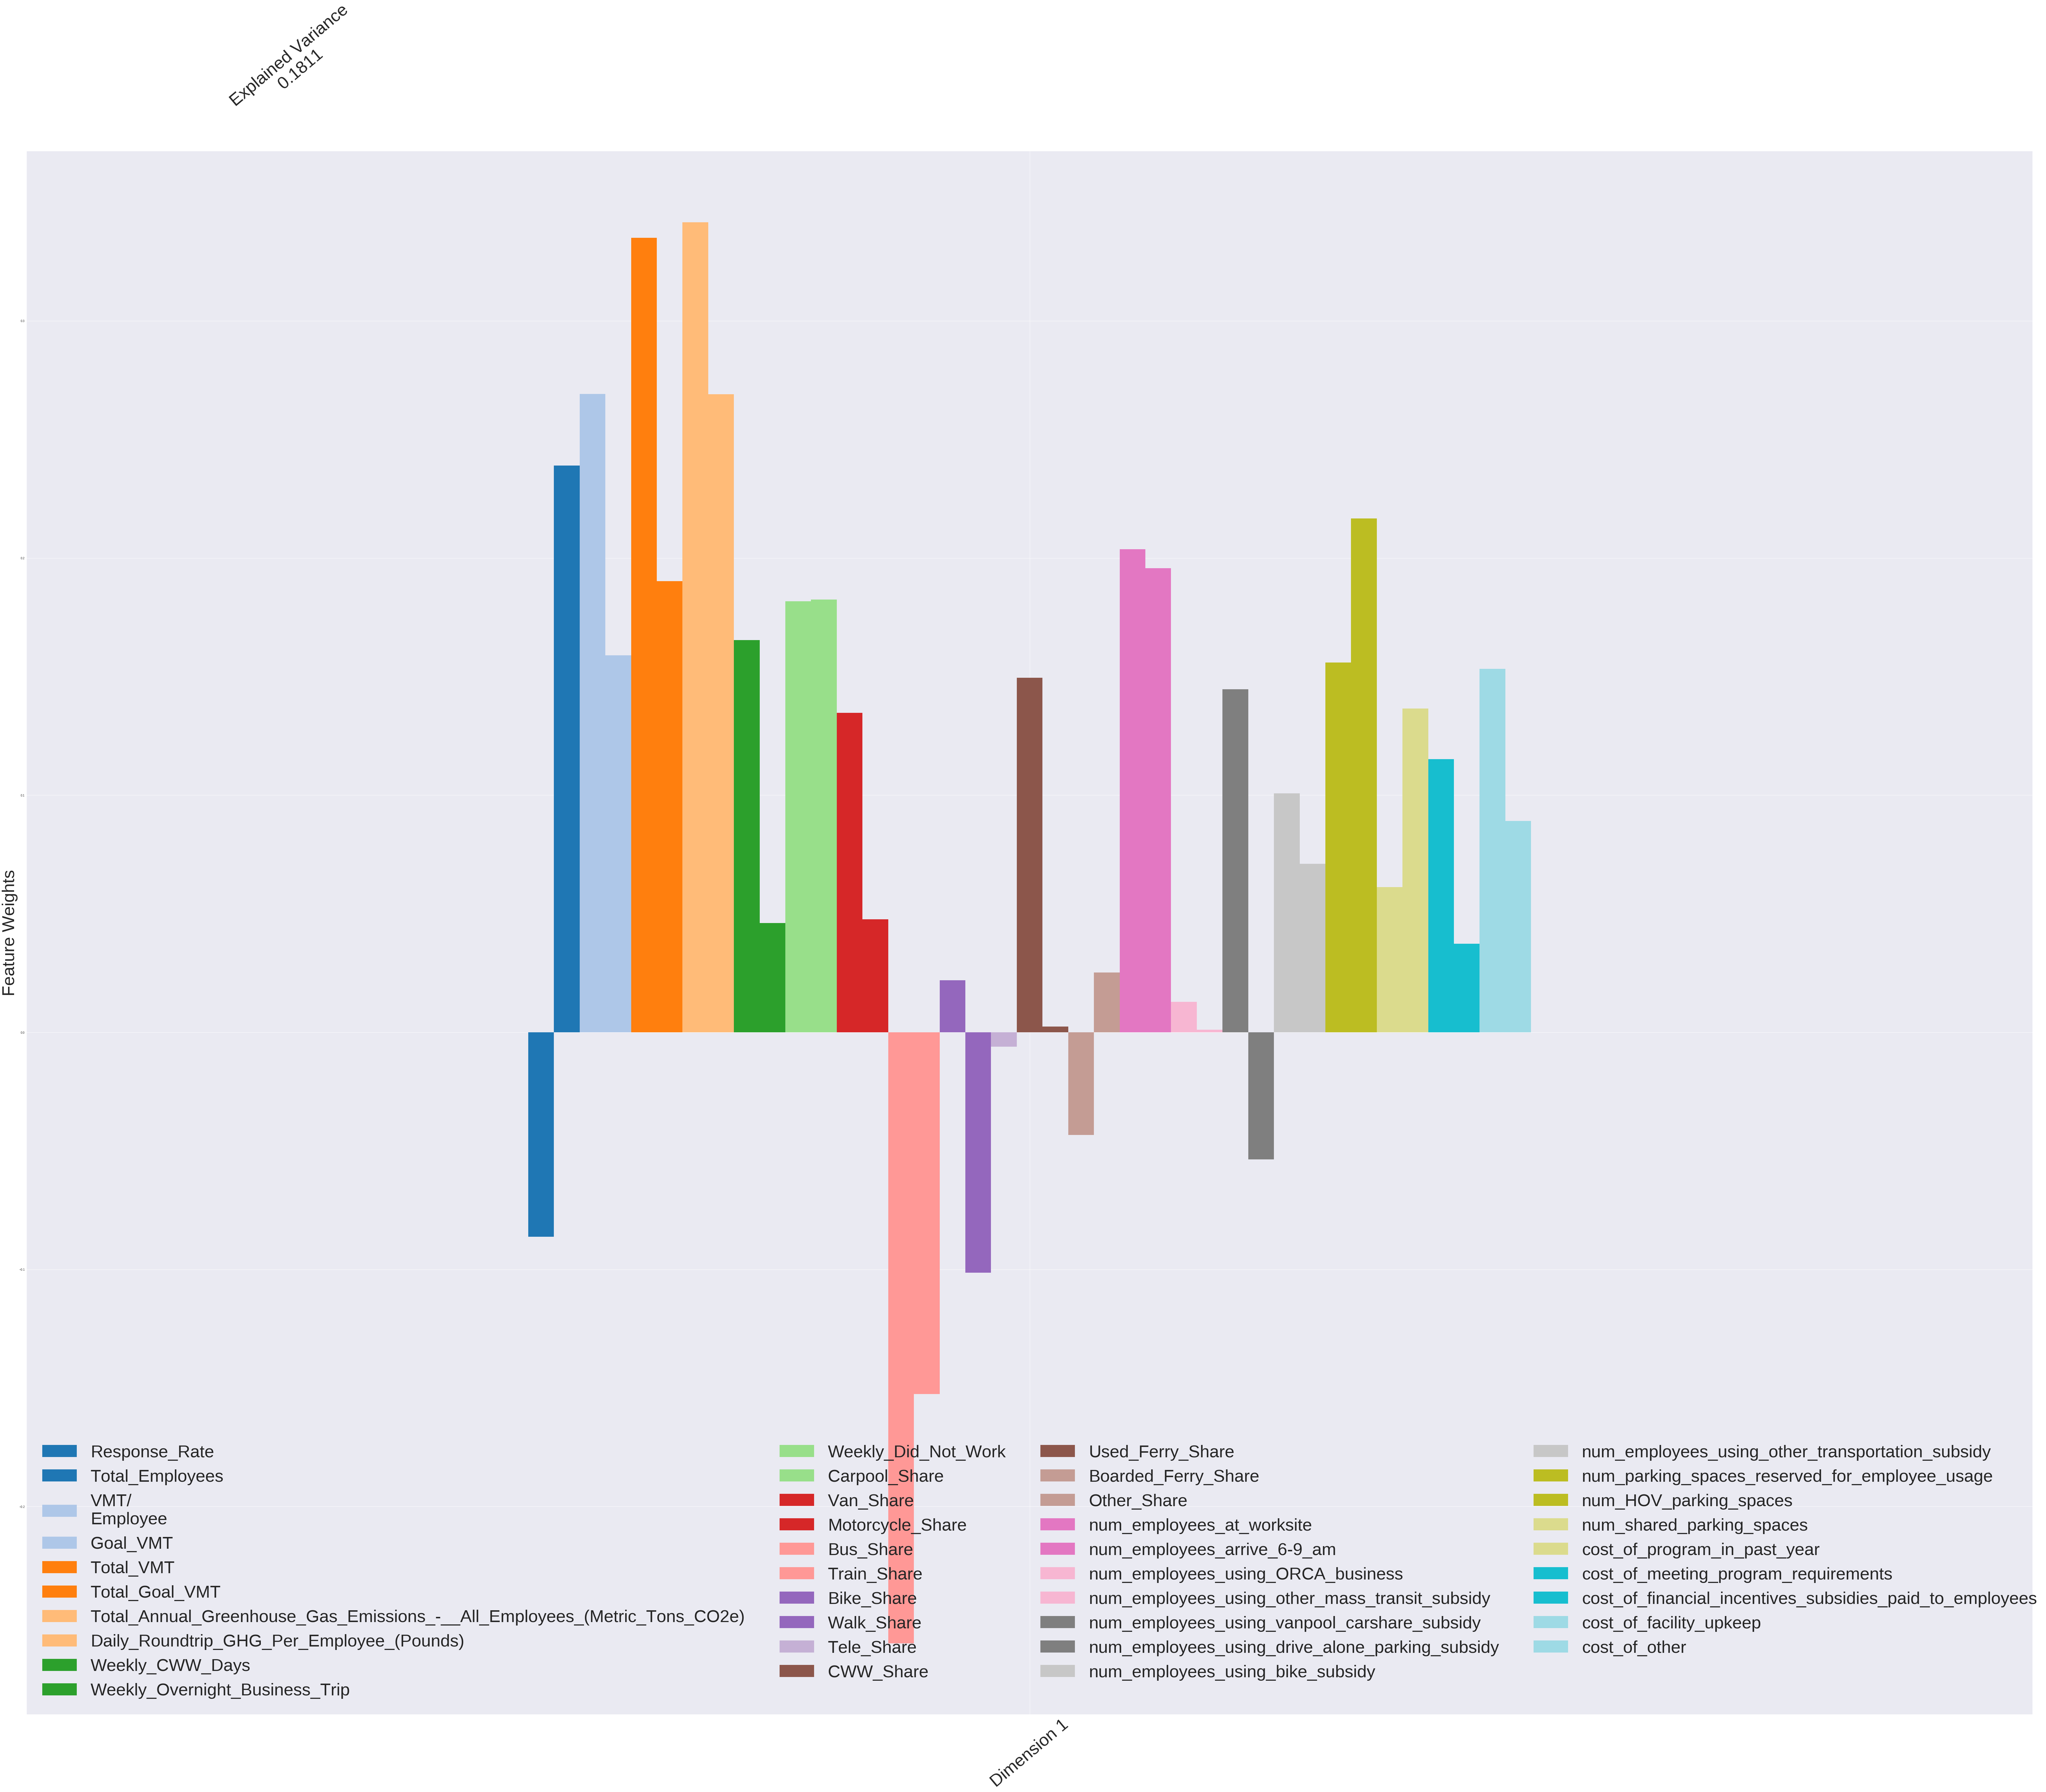

In [22]:
pca_df = viz.pca_results(X_train_sc_df, pca)
# plt.savefig('./figures/pca-loadings-5components.png')

## 5. Cluster Analysis on PCA

* Use unsupervised learning to find clusters of similar data in the principal components.

  8%|▊         | 1/13 [00:00<00:04,  2.46it/s]

For n_clusters = 2 The average silhouette_score is : 0.157920718283


 15%|█▌        | 2/13 [00:00<00:04,  2.64it/s]

For n_clusters = 3 The average silhouette_score is : 0.140233095116


 23%|██▎       | 3/13 [00:01<00:03,  2.72it/s]

For n_clusters = 4 The average silhouette_score is : 0.110708808175


 31%|███       | 4/13 [00:01<00:03,  2.88it/s]

For n_clusters = 5 The average silhouette_score is : 0.106792497756


 38%|███▊      | 5/13 [00:01<00:02,  2.95it/s]

For n_clusters = 6 The average silhouette_score is : 0.103067941934


 46%|████▌     | 6/13 [00:02<00:02,  2.89it/s]

For n_clusters = 7 The average silhouette_score is : 0.101816982409


 54%|█████▍    | 7/13 [00:02<00:02,  2.91it/s]

For n_clusters = 8 The average silhouette_score is : 0.103318729895


 62%|██████▏   | 8/13 [00:02<00:01,  2.83it/s]

For n_clusters = 9 The average silhouette_score is : 0.103356010366


 69%|██████▉   | 9/13 [00:03<00:01,  2.77it/s]

For n_clusters = 10 The average silhouette_score is : 0.101801068229


 77%|███████▋  | 10/13 [00:03<00:01,  2.78it/s]

For n_clusters = 11 The average silhouette_score is : 0.102791666549


 85%|████████▍ | 11/13 [00:03<00:00,  2.78it/s]

For n_clusters = 12 The average silhouette_score is : 0.110252378313


 92%|█████████▏| 12/13 [00:04<00:00,  2.79it/s]

For n_clusters = 13 The average silhouette_score is : 0.10809681847


100%|██████████| 13/13 [00:04<00:00,  2.72it/s]

For n_clusters = 14 The average silhouette_score is : 0.104832475018


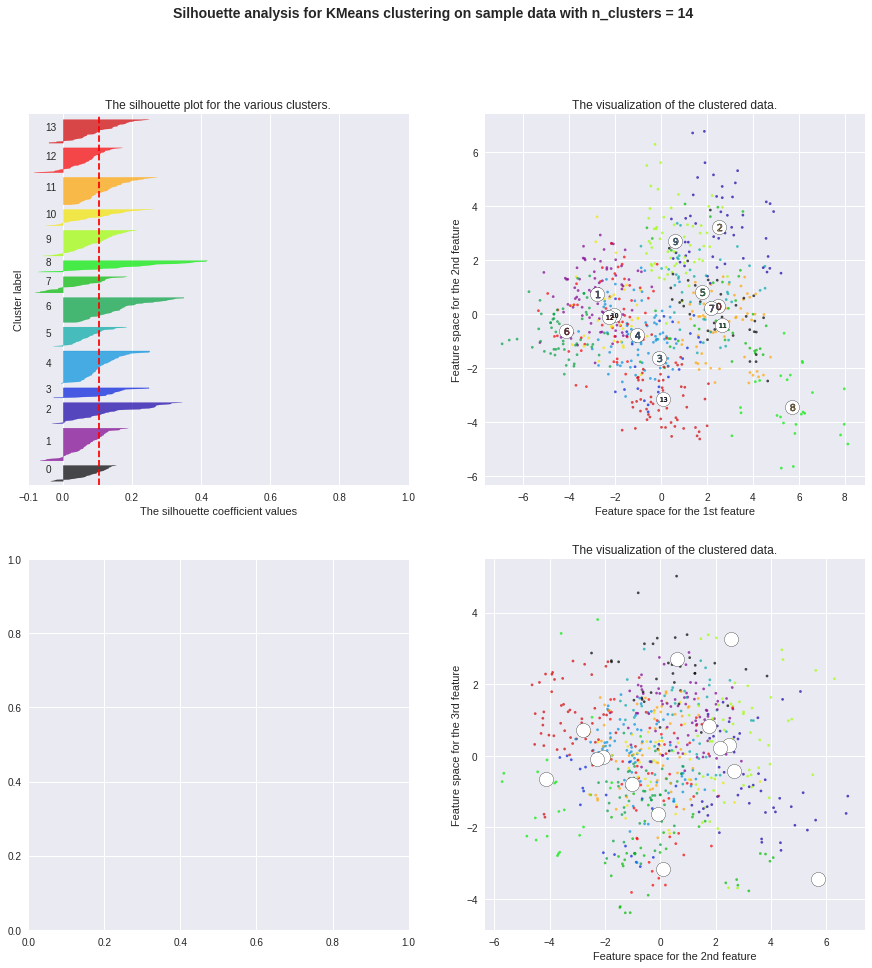

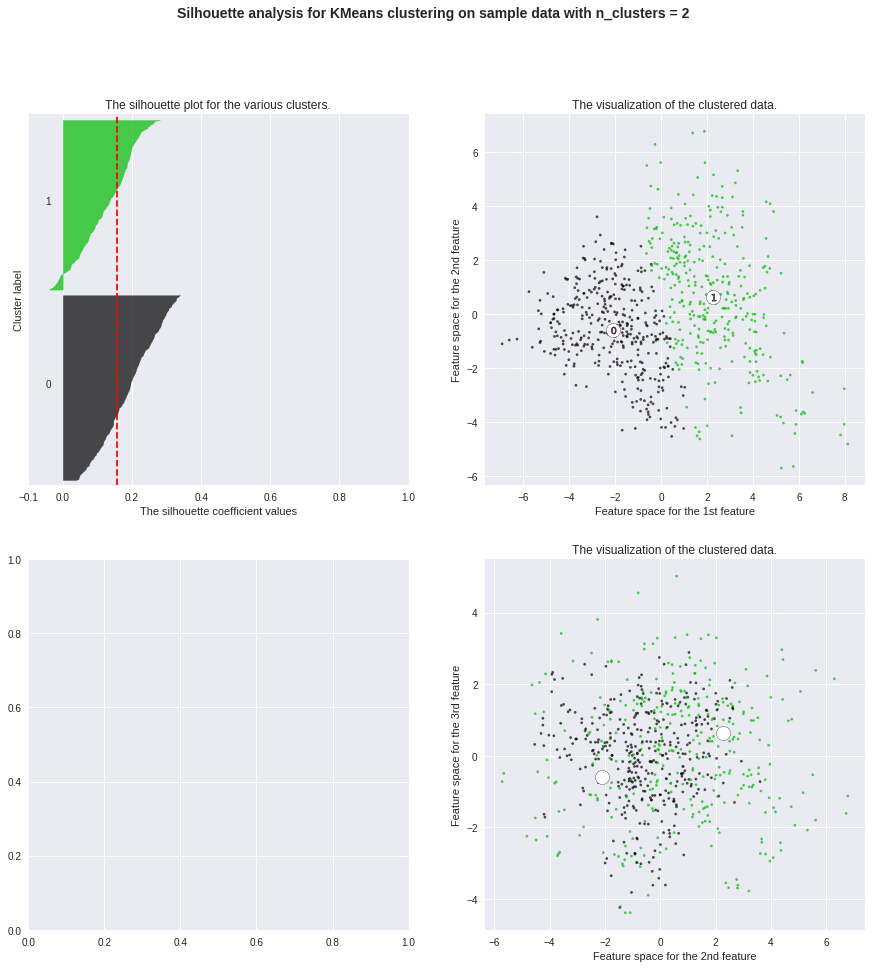

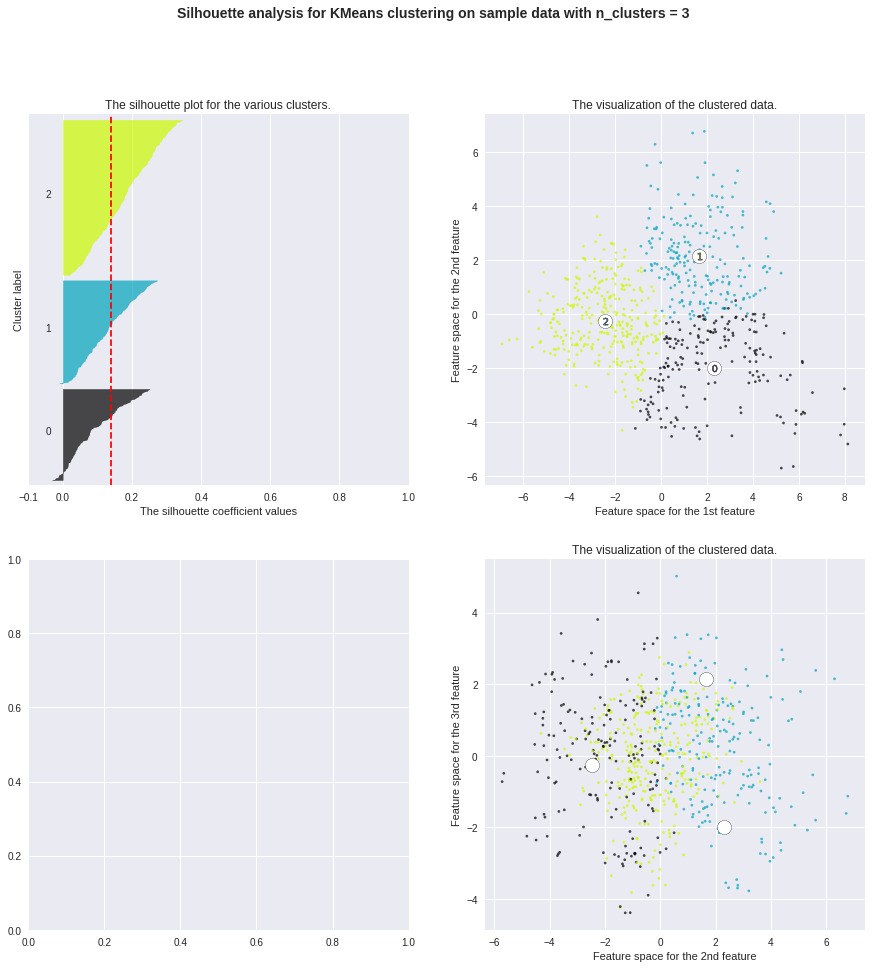

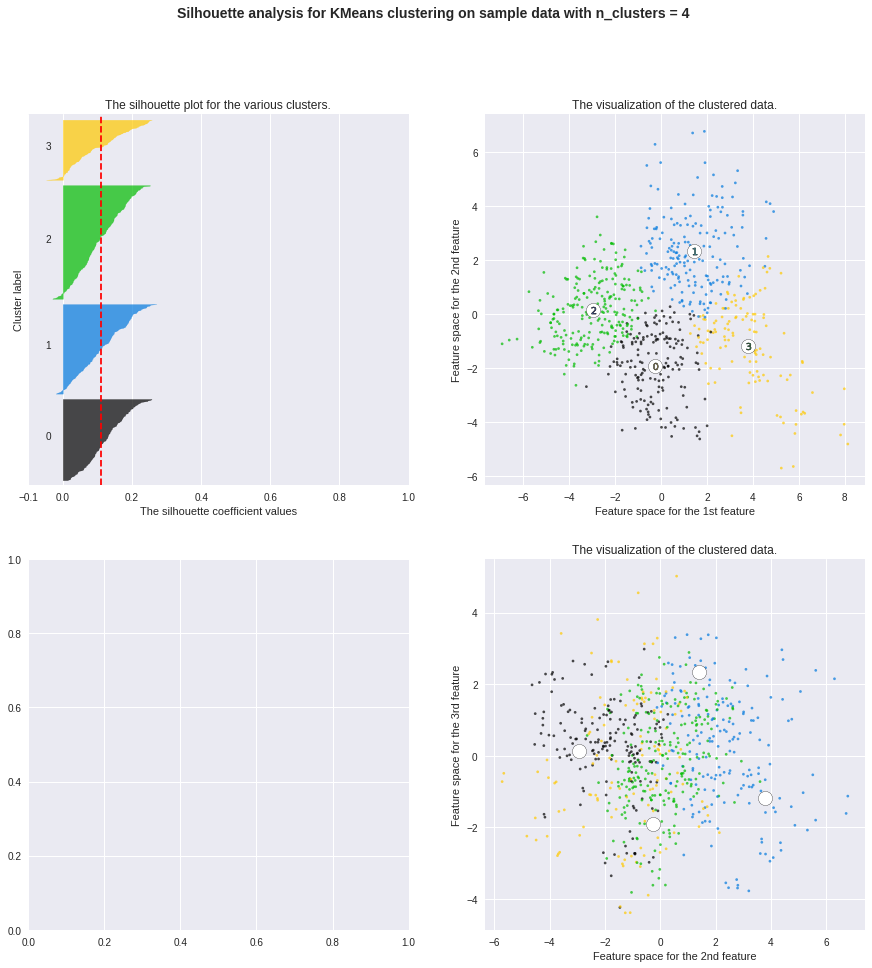

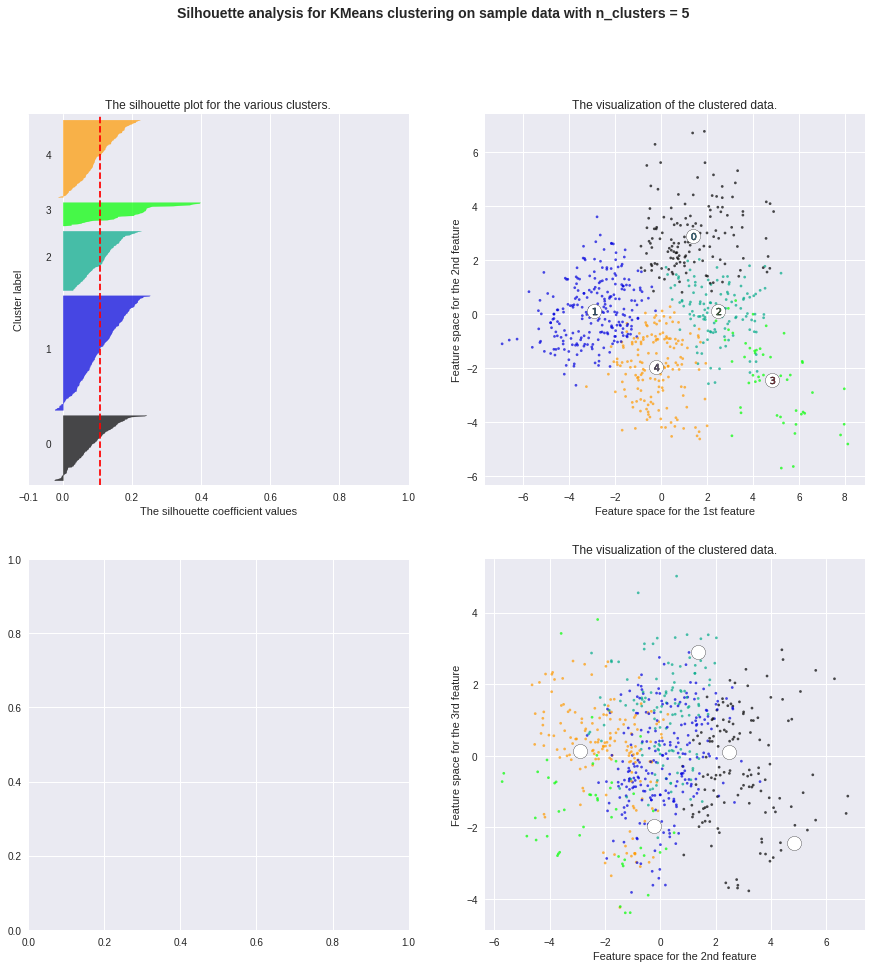

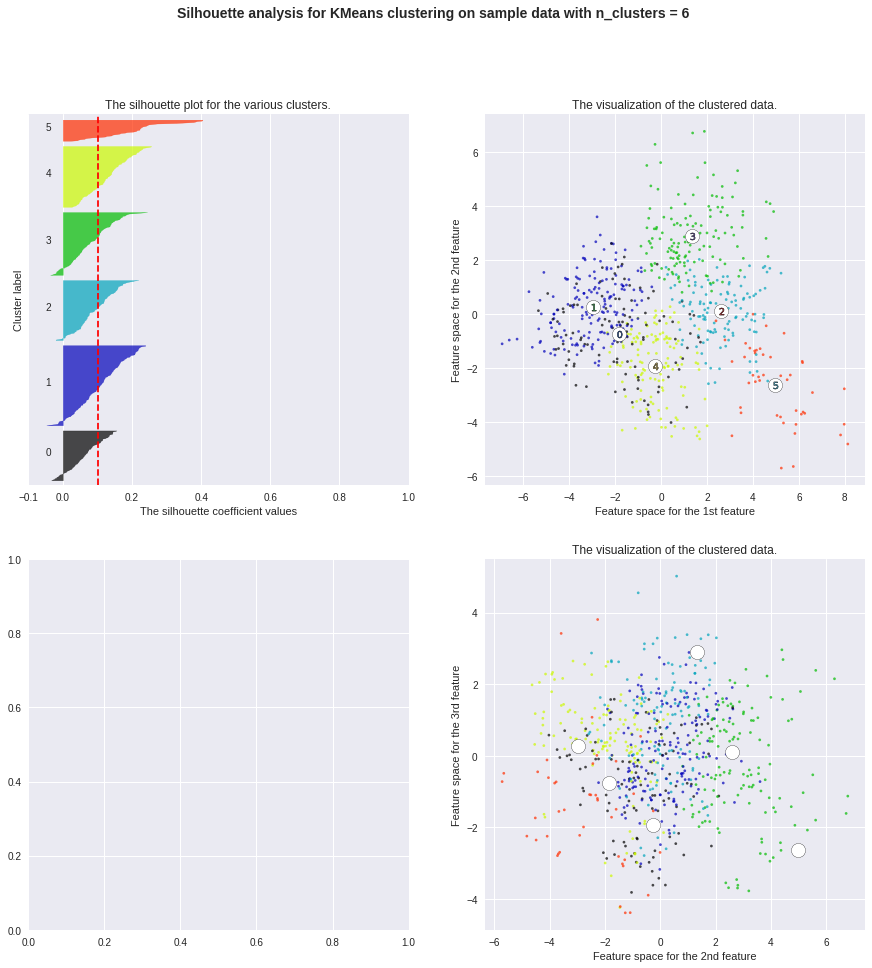

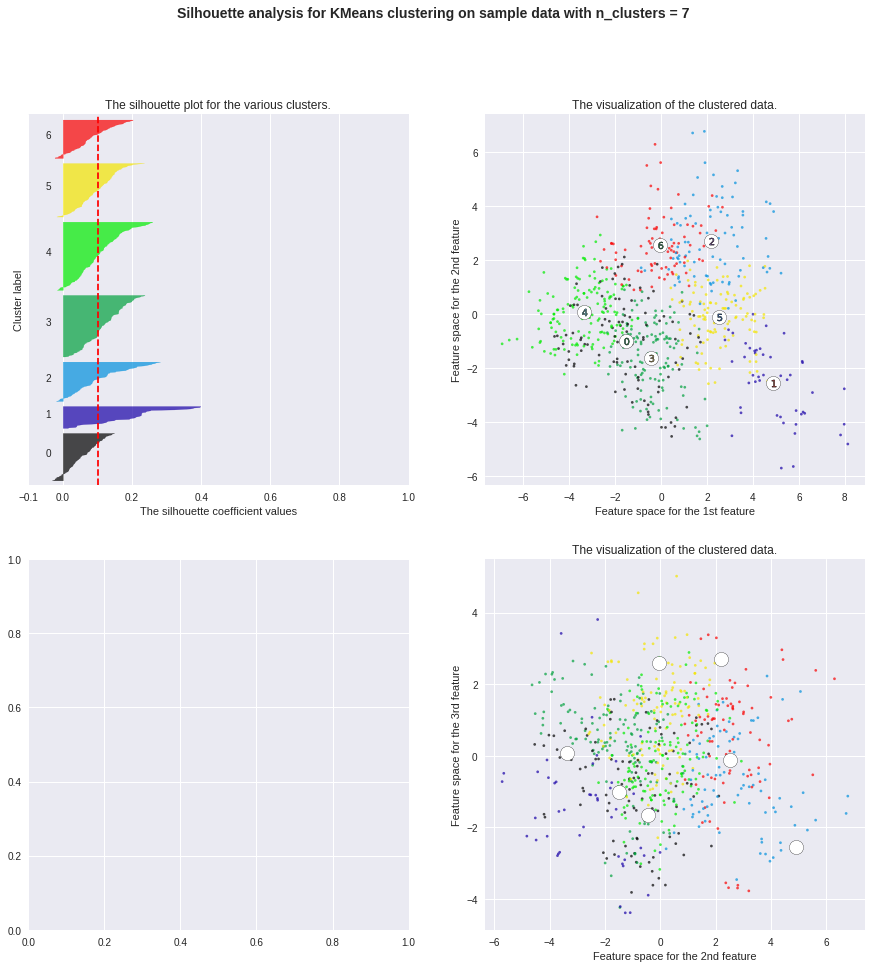

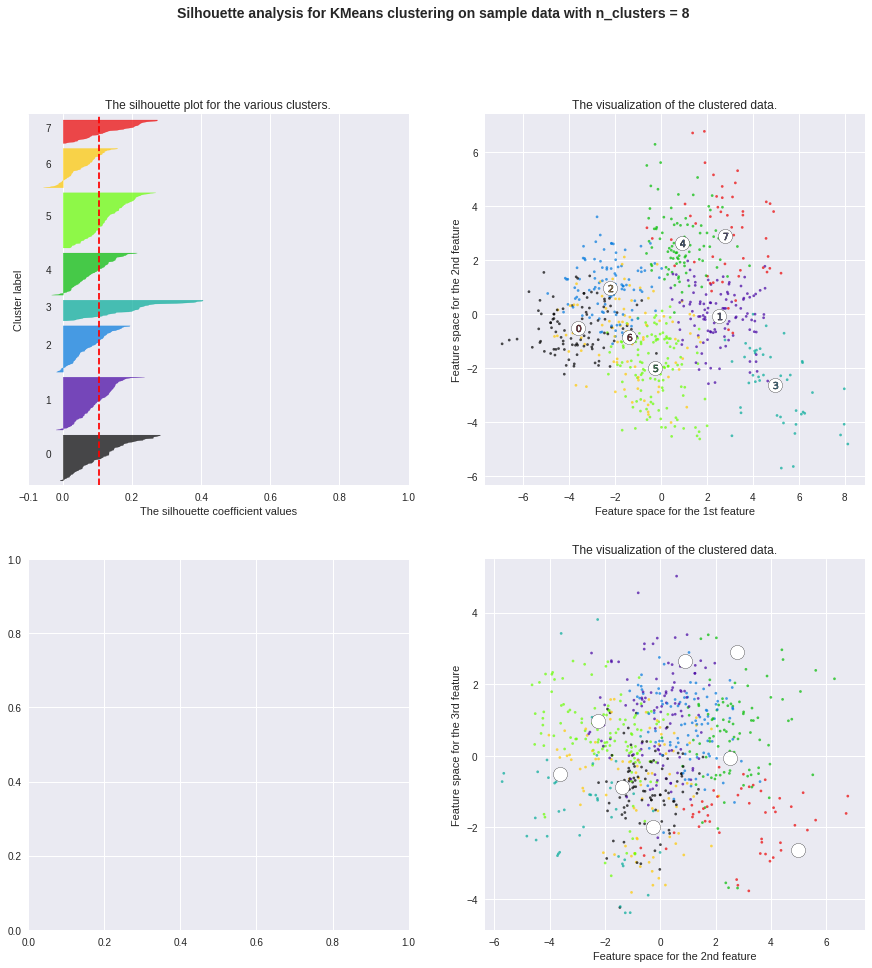

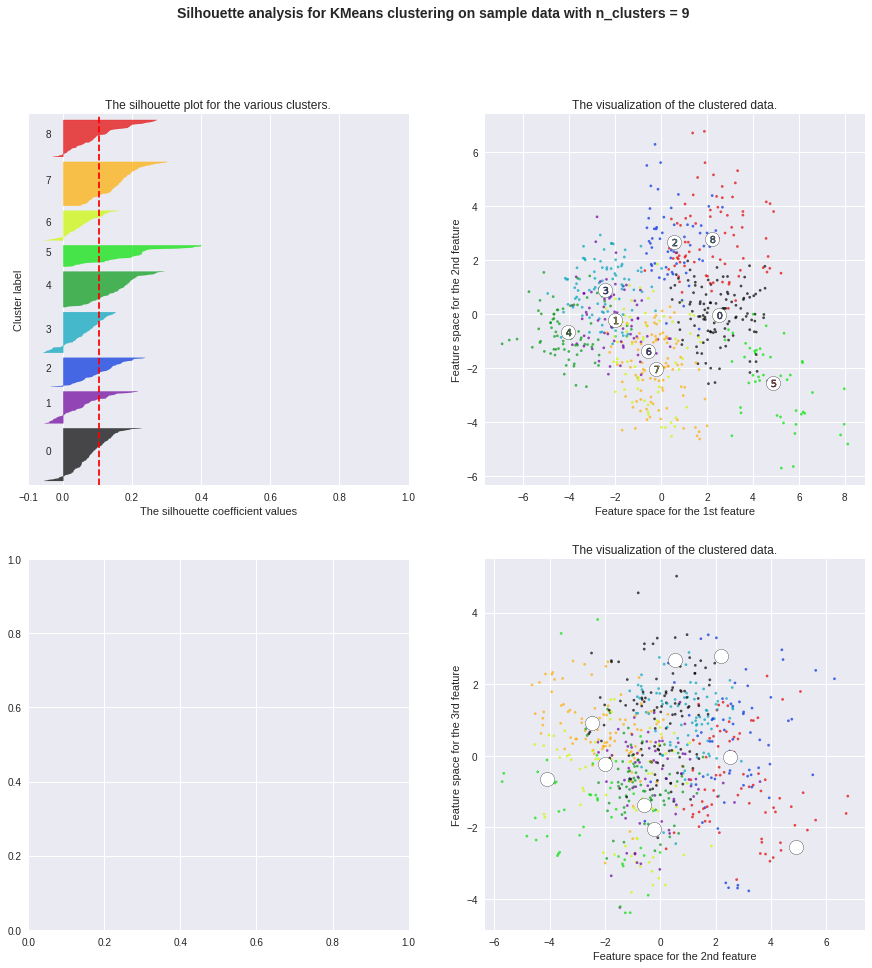

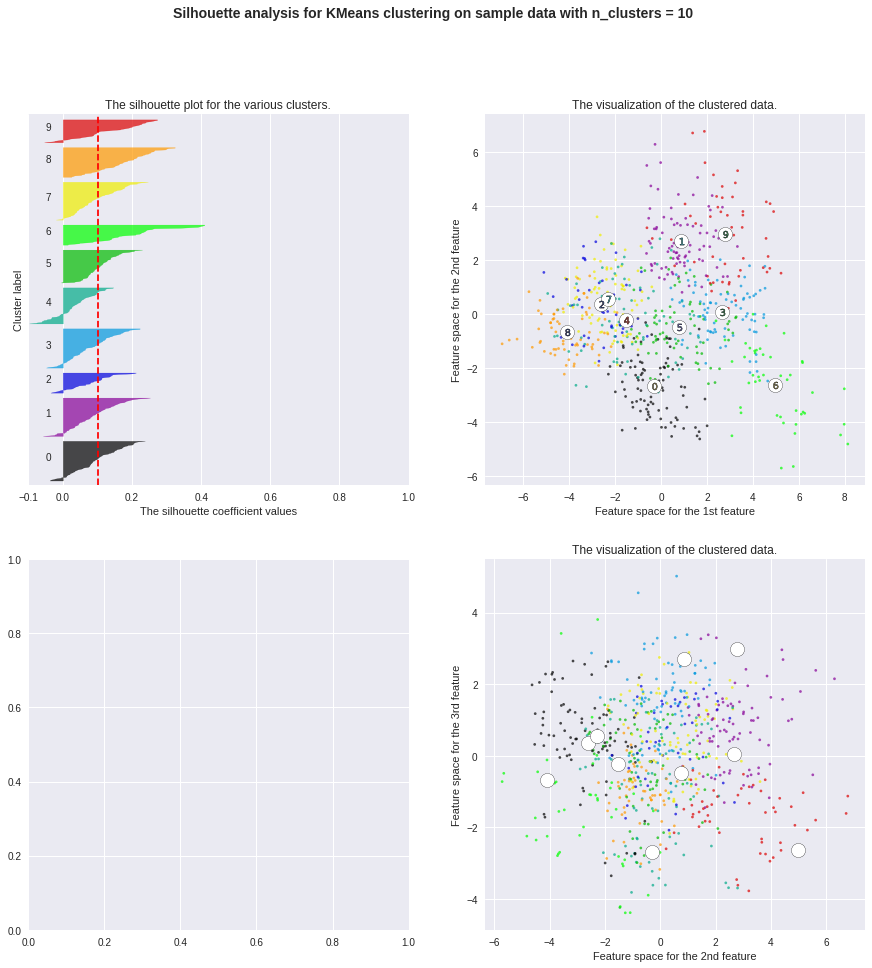

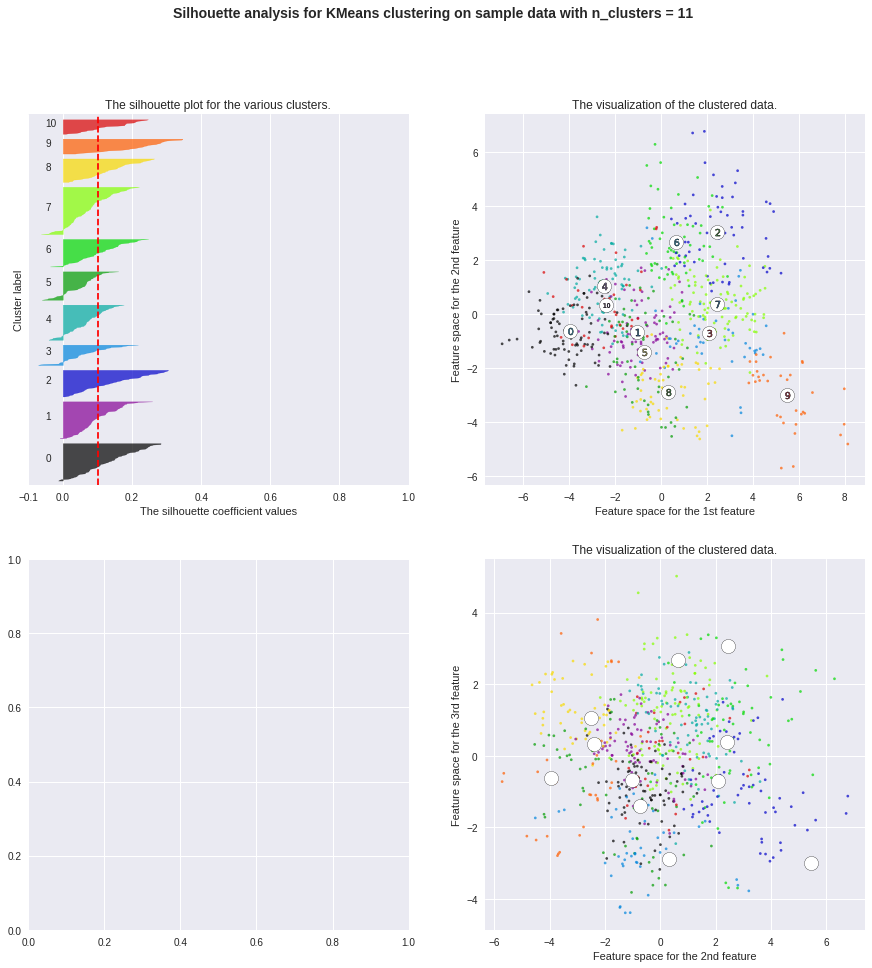

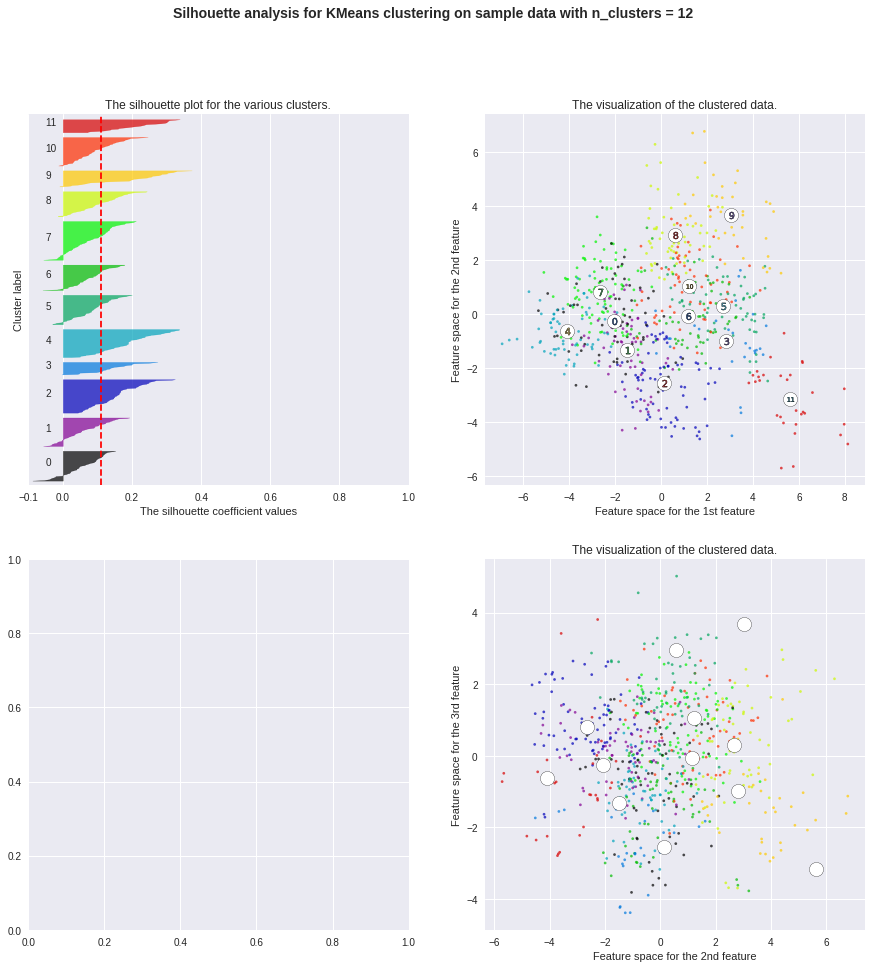

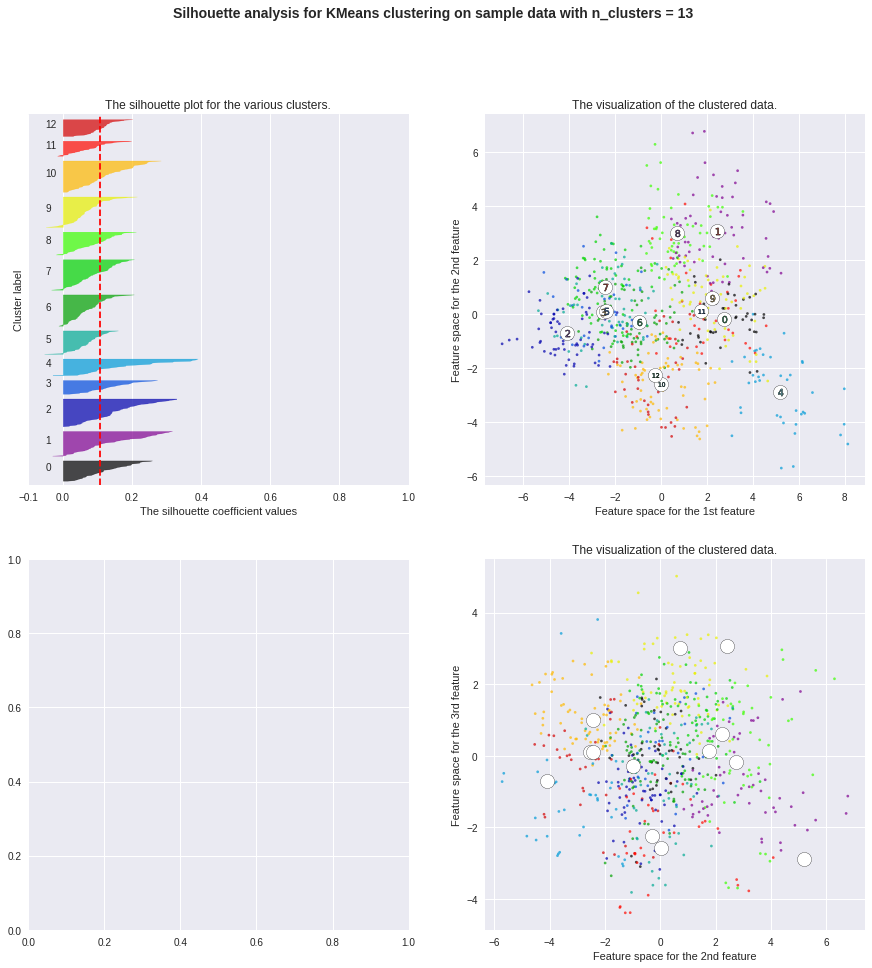

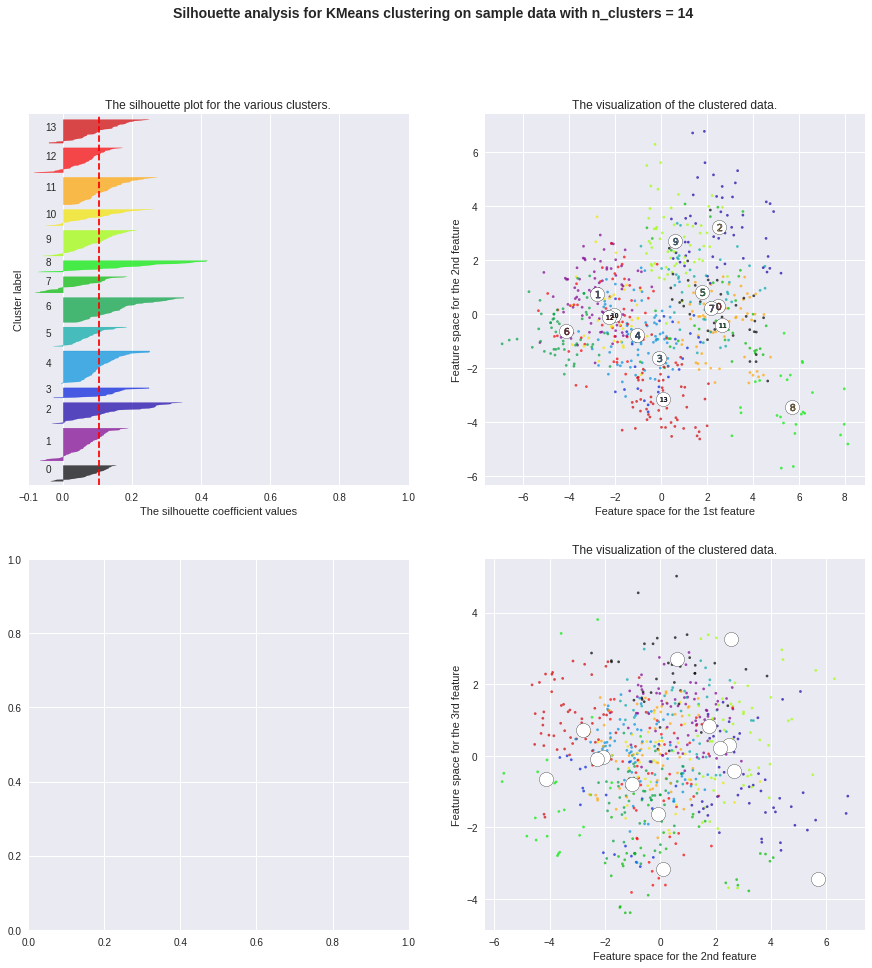

In [20]:
# look at a range of clusters to decide visually which ones represent the data most clearly.
cluster_range(X_train_pca, range(2,15))

100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

For n_clusters = 3 The average silhouette_score is : 0.140301035903


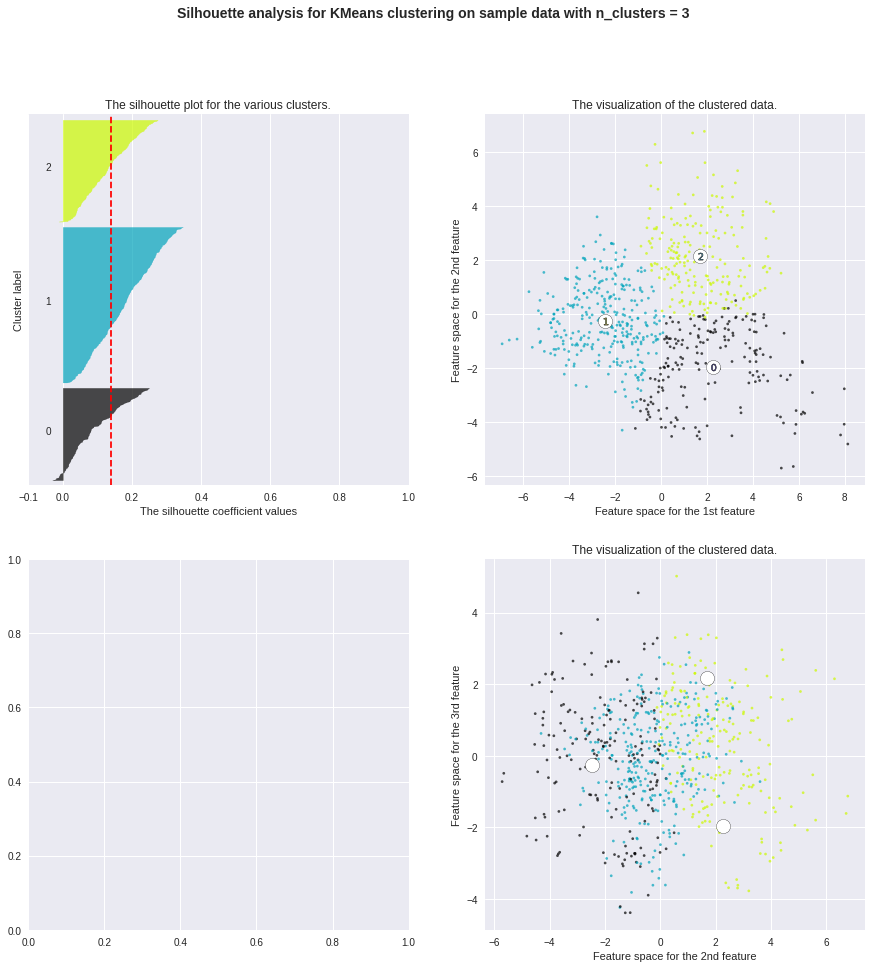

In [21]:
# look at just a cluster of 3, save fig.
cluster_three = cluster_range(X_train_pca, range(3,4))
cluster_three.savefig('./figures/second-try-cluster_analysis_PCA.png')

## 6. Augment Datasets with PCA Data
* Combine numerical and categorical data back together
* Concatenate PCA data to dataset.

In [22]:
for col in X_train_sc_df.columns:
    X_train[col] = X_train_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
X_train_plus_pca_df = pd.concat([X_train, X_train_pca_df], axis=1)
X_train_plus_pca_df.shape

(704, 100)

In [24]:
for col in X_test_sc_df.columns:
    X_test[col] = X_test_sc_df[col]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
X_test_plus_pca_df = pd.concat([X_test, X_test_pca_df], axis=1)
X_test_plus_pca_df.shape

(303, 100)

## 7. Pickling

In [26]:
# entire X_train and X_test data with augmented deskewed and scaled data and pca data
X_train_plus_pca_df.to_pickle('./data/X_train_plus_pca_df.pkl')
X_test_plus_pca_df.to_pickle('./data/X_test_plus_pca_df.pkl')

# X_train and X_test pca data
X_train_pca_df.to_pickle('./data/X_train_pca_df.pkl')
X_test_pca_df.to_pickle('./data/X_test_pca_df.pkl')

# y_train, y_test to run models.
y_train.to_pickle('./data/y_train_new.pkl')
y_test.to_pickle('./data/y_test_new.pkl')